# Problem Set 3, due February 10 at 11:59am (i.e., noon).

###Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [191]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
%matplotlib inline
import sklearn
import random

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [192]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [193]:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
print (bdata.DESCR)

dict_keys(['DESCR', 'target', 'feature_names', 'data'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

---

##Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning (for instance, [this one](https://github.com/jrjohansson/scientific-python-lectures)).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


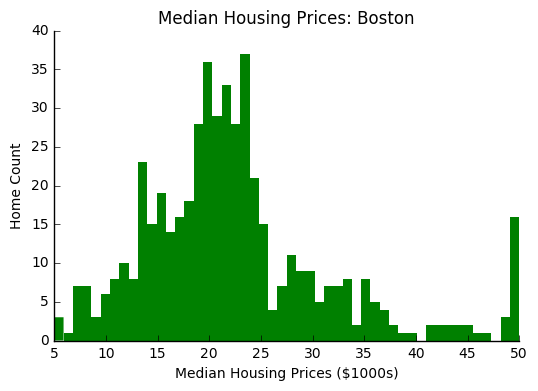

In [194]:
# prepare IPython to work with matplotlib and import the library to something convenient  
import matplotlib.pyplot as plt
%matplotlib inline

#set bins to 50, color green, remove bar borders
ax = plt.axes()
fig1 = plt.hist(bdata.target, bins=50, facecolor='green', edgecolor='none') 
plt.xlabel('Median Housing Prices ($1000s)') #annotate labels 
plt.ylabel('Home Count')
plt.title('Median Housing Prices: Boston')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()




###1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


(0, 55)

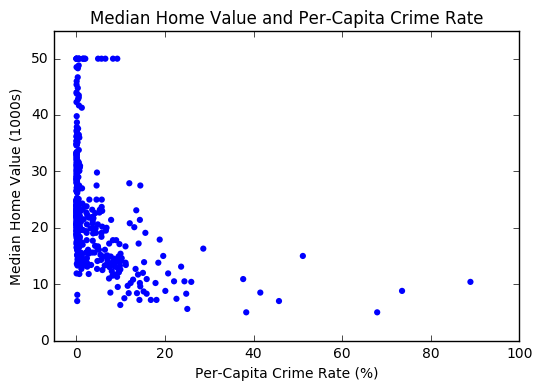

In [195]:
# Pull Target and per capita crime rate
yb = bdata.target
xb = bdata['data'][:,0]

#plot, label, and set limits
plt.scatter(xb,yb, edgecolor = 'none')
plt.title('Median Home Value and Per-Capita Crime Rate')
plt.xlabel('Per-Capita Crime Rate (%)')
plt.ylabel('Median Home Value (1000s)')
plt.xlim(-5, 100)
plt.ylim(0,55)

###1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

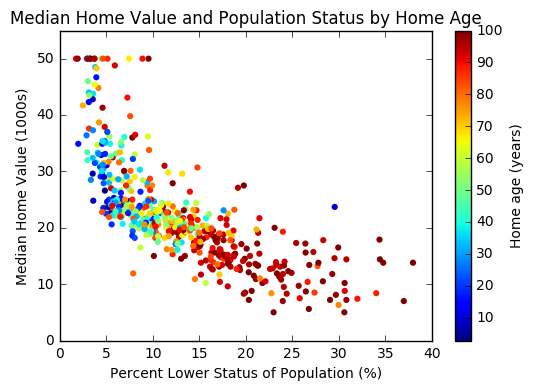

In [196]:
#import colormap
from matplotlib import cm

# Pull Target and define interesting variables
medv = bdata.target
lstat = bdata['data'][:,12]
indus = bdata['data'][:,2]
ptratio = bdata['data'][:,11]
dis = bdata['data'][:,7]
age = bdata['data'][:,6]


#plot, label, and set limits
plt.scatter(lstat,medv,c = age,edgecolor= 'none', cmap = 'jet')
plt.title('Median Home Value and Population Status by Home Age')
plt.xlabel('Percent Lower Status of Population (%)')
plt.ylabel('Median Home Value (1000s)')
plt.xlim(0, 40)
plt.ylim(0,55)
plt.colorbar(label = 'Home age (years)')


---

##Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

###2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [233]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.16
"""

def compute_rmse(predictions, yvalues):
    rmse = np.sqrt(((predictions - yvalues) ** 2).mean()) # Add RMSE function
    return rmse

#Print to see if it works on two arrays
print(compute_rmse(medv,dis))

    

20.7433668573


###2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [1]:
#change array to dataframe
bdata_df = pd.DataFrame(bdata.data)

#add column names
bdata_df.columns = bdata.feature_names

# Attach medv to dataframe
bdata_df['MEDV'] = bdata.target


bdata_df.head()

NameError: name 'pd' is not defined

In [200]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

n = len(bdata.data)
random_order = np.arange(0,n)
np.random.shuffle(random_order)

#training data
bdata_train = bdata.data[random_order[:int(n*.66)],:]
bdata_train_medv = bdata.target[random_order[:int(n*.66)]]

#test data
bdata_test = bdata.data[random_order[int(n*.66):],:]
bdata_test_medv = bdata.target[random_order[int(n*.66):]]

#Print split sets/check to see if they are correct lengths
print(bdata_train.shape, bdata_train_medv.shape)
print (bdata_test.shape, bdata_test_medv.shape)

(333, 13) (333,)
(173, 13) (173,)


###2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [201]:
# Create model
def badmodel (data):
    for i in data:
        prediction = bdata_train_medv.mean()
    return prediction

train_pred = badmodel(bdata_train)

print(compute_rmse(train_pred, bdata_train_medv))

test_pred = badmodel(bdata_test)

print(compute_rmse(test_pred,bdata_test_medv))

8.58496788378
10.2816716248


The test set RMSE is higher than the training RMSE. This is expected because the model hasn't seen the test data yet.

---

##Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [202]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""
def distance(x1, x2, L):

    #Make arrays for calculations
    X1 = np.array(x1)
    X2 = np.array(x2)
    
    dist = ((X2-X1)**L).sum()
    dist = np.power(dist, 1.0/L)
    return dist
print (distance((3,4),(6,8),2))

5.0


###3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [230]:
"""
Function
--------
nearest neighbor(nneighbor)

Given 4 arrays (training and test sets for both x and y) and a value for L, return the rmse

Parameters
----------
x_train, y_train,x_test,y_test : arrays

L: int
    Value of L to use in computing distances

Returns
-------
rmse : float
    The Root Mean Squared Error 

"""

import time
def nneighbor(x_train, y_train, x_test, y_test, L):
    start_time = time.time()
    
#create arrays for training and test sets
    X_Train = np.array(x_train)
    Y_Train = np.array(y_train)
    X_Test = np.array(x_test)
    Y_Test = np.array(y_test)
    Y_Hat = np.zeros(len(Y_Test), dtype=float)
    
#iterate over test set
    for i in range(len(X_Test)):
        output = 0
        minimum_dist = float("inf")
        
        for j in range(len(X_Train)):
            dist = distance(X_Train[j], X_Test[i], L) # calculate distances between Xtrain and Xtest for entire length of j and i
            if(dist < minimum_dist):
                minimum_dist = dist
                output = Y_Train[j] #output the y values for each point
            
        Y_Hat[i] = output # yhat for rmse calculations
        
#calculate RMSE
    rmse = compute_rmse(Y_Hat, Y_Test)
#Print timestamp
    print("Time in seconds " + str(round(time.time() - start_time,2)))
    return rmse

#features: 0 - CRIM, 5 - RM
#Calculate RMSE for nneighbor: Remember-- L=2
nn_rmse = nneighbor(bdata_train[:,(0,5)], bdata_train_medv, bdata_test[:,(0,5)], bdata_test_medv, 2)
print("nneighbor rmse for test set = ", nn_rmse)


Time in seconds 0.82
nneighbor rmse for test set =  7.45009989459


###3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [210]:
"""
Function
--------
normalize (normalization function)

The input uses raw data, mean and standard deviation to normalize the features

Parameters
----------
raw_data 

Returns
-------
norm_data :

the normalized data calculation
"""
def normalize(raw_data):
    norm_data = (raw_data - raw_data.mean()) / raw_data.std()
    return norm_data

#create arrays for training and test sets
Xtrain_norm = np.array(normalize(bdata_train))
Xtest_norm = np.array(normalize(bdata_test))
#Ytrain_norm = np.array(normalize(bdata_train_medv))
#Ytest_norm = np.array(normalize(bdata_test_medv))

#nn with normalized data
nn_norm_rmse = nneighbor(Xtrain_norm[:,(0,5)], bdata_train_medv, Xtest_norm[:,(0,5)], bdata_test_medv , 2)
print("nneighbor norm rmse for test set = ", nn_norm_rmse)


Time in seconds 0.8
nneighbor norm rmse for test set =  7.80673712307


Normalization increased the rmse from 7.4 to 7.8, though I am not entirely sure why.

###3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [215]:
#6 - AGE              
#5 - NOX
#10 - PTRATIO
#12 - LSTAT

#nn with age and ptratio: L=2
nn1 = nneighbor(Xtrain_norm[:,(6,10)], bdata_train_medv, Xtest_norm[:,(6,10)], bdata_test_medv, 2)
print ("age and ptratio:L2", nn1)

#nn with age and ptratio: L=5
nn2 = nneighbor(Xtrain_norm[:,(6,10)], bdata_train_medv, Xtest_norm[:,(6,10)], bdata_test_medv, 5)
print ("age and ptratio:L5", nn2)

#nn with lstat and nox: L=2
nn3 = nneighbor(Xtrain_norm[:,(6,10)], bdata_train_medv, Xtest_norm[:,(5,12)], bdata_test_medv, 2)
print ("age and ptratio:L2", nn3)

#nn with lstat and nox: L=10
nn4 = nneighbor(Xtrain_norm[:,(6,10)], bdata_train_medv, Xtest_norm[:,(5,12)], bdata_test_medv, 10)
print ("age and ptratio:L10", nn4)

#nn with lstat and nox: L=1
nn5 = nneighbor(Xtrain_norm[:,(6,10)], bdata_train_medv, Xtest_norm[:,(5,12)], bdata_test_medv, 1)
print ("age and ptratio:L1", nn5)

#nn with all features: L=1
nn6 = nneighbor(Xtrain_norm[:,], bdata_train_medv, Xtest_norm[:,], bdata_test_medv, 1)
print ("all:L1", nn6)

#nn with all features: L=10
nn7 = nneighbor(Xtrain_norm[:,], bdata_train_medv, Xtest_norm[:,], bdata_test_medv, 10)
print ("all:L10", nn7)

#nn with lstat and nox: L=2
nn8 = nneighbor(Xtrain_norm[:,], bdata_train_medv, Xtest_norm[:,], bdata_test_medv, 2)
print ("all:L2", nn8)

Time in seconds 0.81
age and ptratio:L2 10.9877546134


/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in power


Time in seconds 1.19
age and ptratio:L5 12.210660556
Time in seconds 0.84
age and ptratio:L2 9.40670035457
Time in seconds 1.0
age and ptratio:L10 8.44420997376
Time in seconds 0.74
age and ptratio:L1 13.6257428073
Time in seconds 0.79
all:L1 21.0747376371
Time in seconds 0.98
all:L10 8.78791866433
Time in seconds 0.85
all:L2 8.12317387215


The lowest RMSE cam from using all the features with a distance of L=2.  Perhaps it is that the more features you add, the lower the mean squared error. The running time for the algorithm seems to be most affected by the L value put in. The three nn calcualtions above with L >2 have the highest running times.

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [216]:

#Define Broad/General Function
def nn_cv (data_length, n_folds):
    np.random.seed(seed=44)   #Set random seed
    fsize = data_length/n_folds   #Create fold size
    k_results = []    # create empty results list
    
    for i in range(n_folds):   #creating training and test for each fold
        train_index=np.random.choice(data_length, fsize, replace=False) #NO REPLACEMENT to make sure all data points are represented
        test_index=np.asarray([i for i in range(data_length) if i not in train_index]) #if not in training, put in test
        k_results.append((train_index, test_index))
    return k_results   #return the list


In [223]:
#RUN THE NN_CV

n_folds = 10    #Set number of folds
k_folds = nn_cv(len(bdata_train), n_folds = n_folds)   #Store function in k_folds, and use bdata_train for calculation

start_time = time.time()   
i=0   #set i = 0 to start
kfold_rmse = 0   # set kfold_rmse to 0 to start

#run K-fold cv
for train, test in k_folds:
    i+=1    #increase i by increments of 1
    print(i)   #Print each fold
# find nn RMSE    
    nn_rmse2 = nneighbor(Xtrain_norm[train][:,(0,5)], bdata_train_medv[train], 
                        Xtrain_norm[test][:,(0,5)], bdata_train_medv[test], 2)
    kfold_rmse += nn_rmse2  
    print ("nn rmse2 =", nn_rmse2)

#find average rmse
kfold_rmse /= n_folds    

#print
print("avg rmse = ", kfold_rmse)
print("Time in seconds " + str(round(time.time() - start_time,2)))



/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1
Time in seconds 0.15
nn rmse2 = 6.94083328331
2
Time in seconds 0.16
nn rmse2 = 5.43677600544
3
Time in seconds 0.14
nn rmse2 = 5.95465364232
4
Time in seconds 0.14
nn rmse2 = 6.9056329664
5
Time in seconds 0.18
nn rmse2 = 7.36569752298
6
Time in seconds 0.15
nn rmse2 = 5.1440418609
7
Time in seconds 0.15
nn rmse2 = 6.39310305459
8
Time in seconds 0.13
nn rmse2 = 7.03384674271
9
Time in seconds 0.15
nn rmse2 = 5.05227011682
10
Time in seconds 0.14
nn rmse2 = 4.9716161021
avg rmse =  6.11984712976
Time in seconds 1.5


###3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [250]:
"""
Function
--------
K's Nearest Neighbor (knn)

Given 4 arrays (training and test sets for both x and y) and a value for L (distance), and K (number of neibors to find)

Parameters
----------
x_train, y_train,x_test,y_test : arrays

L: int
    Value of L to use in computing distances
K: int
   Number of neighbors to find 

Returns
-------
rmse : float
    The Root Mean Squared Error 

"""

from collections import Counter

def knn(x_train, y_train, x_test, y_test, L, K):
    start_time = time.time()
    
    #Create Predictions (yhat) list
    #create arrays for training and test sets like before
    X_Train = np.array(x_train)
    Y_Train = np.array(y_train)
    X_Test = np.array(x_test)
    Y_Test = np.array(y_test)
    #Y_Hat = np.zeros(len(Y_Test), dtype=float)
    y_hat = []
    
    #for each instance in test set, find NN in training set
    for i in range(len(X_Test)):
        k_nearest = []
        distances = []
        #Calculate distance between x train and x test values
        for j in range (len(X_Train)):
            dist = distance(X_Test[i,:], X_Train[j,:],L)
            distances.append([dist, j])
            
        #Sort distances
        distances = sorted(distances)
        
        #list KNN targets
        for k in range(K):
            index = distances[k][1]
            k_nearest.append(Y_Train[index])
    
        #find most common target
        y_hat.append(Counter(k_nearest).most_common (1)[0][0])
    
#calculate RMSE
    rmse = compute_rmse(y_hat, Y_Test)
#Print timestamp
    print("Time in seconds " + str(round(time.time() - start_time,2)))
    return rmse

#Print
knn_rmse1 = knn(Xtrain_norm[:,(0,5)], bdata_train_medv, Xtest_norm[:,(0,5)], bdata_test_medv , 2,3)
print ("knn test data (normal.) rmse = ",knn_rmse1)

#####  CROSS VALIDATION  ######

n_folds = 10    #Set number of folds
k_folds = nn_cv(len(bdata_train), n_folds = n_folds)   #Store function in k_folds, and use bdata_train for calculation

start_time = time.time()   
i=0                                    #set i = 0 to start
kfold_rmse = 0                         # set kfold_rmse to 0 to start

#run K-fold cv 
for train, test in k_folds:
    i+=1                               #increase i by increments of 1
    print(i)                           #Print each fold
# find nn RMSE    
    knn_rmse_cv = knn(Xtrain_norm[train][:,(0,5)], bdata_train_medv[train], 
                        Xtrain_norm[test][:,(0,5)], bdata_train_medv[test], 2,3)
    kfold_rmse += knn_rmse_cv  
    print ("knn_rmse_cv =", knn_rmse_cv)

#find average rmse
kfold_rmse /= n_folds    

#print
print("avg rmse = ", kfold_rmse)
print("Time in seconds " + str(round(time.time() - start_time,2)))

       

Time in seconds 0.99
knn test data (normal.) rmse =  8.37521460341
1
Time in seconds 0.16
knn_rmse_cv = 8.59476003155
2


/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Time in seconds 0.19
knn_rmse_cv = 5.98792117517
3
Time in seconds 0.2
knn_rmse_cv = 6.5839628391
4
Time in seconds 0.19
knn_rmse_cv = 9.92123648208
5
Time in seconds 0.18
knn_rmse_cv = 10.0258150126
6
Time in seconds 0.16
knn_rmse_cv = 5.3283111771
7
Time in seconds 0.18
knn_rmse_cv = 6.0256977466
8
Time in seconds 0.17
knn_rmse_cv = 7.10827452105
9
Time in seconds 0.19
knn_rmse_cv = 6.31646789485
10
Time in seconds 0.16
knn_rmse_cv = 6.56940382886
avg rmse =  7.2461850709
Time in seconds 1.77


###3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [295]:
#Things to Remember:
#CRIM(0)
#ZN(1)
#RM(5)
#AGE(6)
#DIS(7)
#TAX(9)

n_folds = 25    #Set number of folds
k_folds = nn_cv(len(bdata_train), n_folds = n_folds)   #Store function in k_folds, and use bdata_train for calculation

start_time = time.time()   
i=0                                    #set i = 0 to start
kfold_rmse = 0                         # set kfold_rmse to 0 to start

#Make empty list for plotting
K_RMSE = []

#run K-fold cv 
for train, test in k_folds:
    i+=1                               #increase i by increments of 1
    print(i)                           #Print each fold
# find nn RMSE    
    knn_rmse_cv2 = knn(Xtrain_norm[train][:,(0,1,5,6,7,9)], bdata_train_medv[train], 
                        Xtrain_norm[test][:,(0,1,5,6,7,9)], bdata_train_medv[test], 2,3)
    kfold_rmse += knn_rmse_cv2  
    K_RMSE.append([i,knn_rmse_cv2])
    print ("knn_rmse_cv =", knn_rmse_cv2)

#find average rmse
kfold_rmse /= n_folds    

#print
print("avg rmse = ", kfold_rmse)
print("Time in seconds " + str(round(time.time() - start_time,2)))



/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1
Time in seconds 0.09
knn_rmse_cv = 10.1358136699
2
Time in seconds 0.07
knn_rmse_cv = 9.3980333714
3
Time in seconds 0.08
knn_rmse_cv = 11.6041789348
4
Time in seconds 0.09
knn_rmse_cv = 14.0063088464
5
Time in seconds 0.08
knn_rmse_cv = 12.1556776858
6
Time in seconds 0.08
knn_rmse_cv = 9.71219111478
7
Time in seconds 0.07
knn_rmse_cv = 9.39489389243
8
Time in seconds 0.08
knn_rmse_cv = 9.00367980328
9
Time in seconds 0.07
knn_rmse_cv = 7.67461929023
10
Time in seconds 0.07
knn_rmse_cv = 15.4284538273
11
Time in seconds 0.07
knn_rmse_cv = 7.59720960287
12
Time in seconds 0.07
knn_rmse_cv = 8.91652608923
13
Time in seconds 0.07
knn_rmse_cv = 8.27671621176
14
Time in seconds 0.07
knn_rmse_cv = 8.76600322268
15
Time in seconds 0.08
knn_rmse_cv = 11.5956214797
16
Time in seconds 0.09
knn_rmse_cv = 12.7511580356
17
Time in seconds 0.08
knn_rmse_cv = 17.143106304
18
Time in seconds 0.07
knn_rmse_cv = 9.37757797888
19
Time in seconds 0.07
knn_rmse_cv = 8.44012181488
20
Time in seconds 0.07

[[1, 10.13581366985404], [2, 9.3980333714027644], [3, 11.604178934763114], [4, 14.00630884637348], [5, 12.155677685756562], [6, 9.7121911147794044], [7, 9.394893892429014], [8, 9.0036798032804342], [9, 7.6746192902319263], [10, 15.428453827263443], [11, 7.5972096028739395], [12, 8.9165260892345302], [13, 8.2767162117593482], [14, 8.7660032226779379], [15, 11.5956214796793], [16, 12.751158035645233], [17, 17.143106303992869], [18, 9.3775779788813267], [19, 8.4401218148792143], [20, 8.337031471093292], [21, 10.981302290712152], [22, 10.154984921209879], [23, 8.4693343894310846], [24, 9.2722620621938852], [25, 9.413082651289109]]


(0, 25)

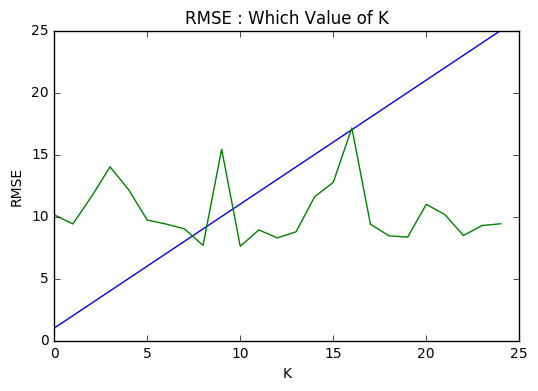

In [305]:
 #create array
#K_RMSE= np.array(25, rmse_val)
#K_RMSE = np.arange(25)
#K_RMSE = np.array(int([k[i],kfold_rmse]))
#K_RMSE.shape(25, len(kfold_rmse))

#K_RMSE = (k[i],kfold_rmse)
print(K_RMSE)
plt.plot(K_RMSE)
plt.title('RMSE : Which Value of K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.ylim(0,25)



Based on the plot and the output, I can tell by the output of the function, that a k of 11 produces the lowest rmse at 7.59.